# Séries de Fourier de tempo discreto

Renato Naville Watanabe

## Preparação do ambiente



In [37]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB: 
  !pip install ipympl

In [39]:

import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import PlotGrid
%matplotlib widget

## Motivação

Como visto anteriormente os sinais do tipo:

$x[n] = e^{j\omega n}$

são autofunções de sistemas lineares e invariantes no tempo. Ou seja, a saída de um sistema linear e invariante no tempo para essa entrada é:

$y[n] = H(e^{j\omega})e^{j\omega n}$

em que $H(e^{j\omega})$ é o valor da resposta em frequência do sistema para a frequência angular $\omega$.

Isso faz com que seja interessante descrever um sinal qualquer como uma combinação linear de exponenciais complexas. 

Um tipo de sinal que já vimos ser uma combinação linear de exponenciais complexas é o cosseno:

$\cos(\omega n) = \frac{e^{j\omega n}+ e^{-j\omega n}}{2}$

Em 1807, Joseph Fourier apresentou um método para representar qualquer sinal periódico como uma combinação linear de exponenciais complexas harmonicamente relacionadas.

## Exponenciais complexas harmonicamente relacionadas

Exponenciais harmonicamente relacionadas $\phi_k(t)$ são exponenciais complexas que têm um período $T$ em comum (o termo "harmônico" tem o mesmo significado do empregado em música). Ou seja, são sinais com frequências que são múltiplas da menor frequência encontrada entre os sinais.

$\phi_k[n]= A_ke^{jk\omega_0 n}, k = 0,\pm 1,\pm 2 ... T_0$

em que $T_0$ é o período fundamental do sinal. Diferentemente de sinais de tempo contínuo, existe um número finito exponenciais harmonicamente relacionadas quando o tempo é discreto.

Para $k = 0$ o sinal é uma constante e para os outros valores de $k$ a frequência angular do sinal  é $|k|\omega_0$. O período fundamental de um sinal que seja a soma dessas exponenciais harmônicas é:

$T_0 = \frac{2\pi}{\omega_0}$

Note que o sinal discreto será periódico somente se existir um valor de $T_0$ inteiro. Para isso, $\omega_0$ tem que ser múltiplo de $\pi$.

Os componentes para $k = N$ e $k = -N$ são chamados de N-ésima harmônica. Os componentes para $k=1$ e $k=-1$ são as harmônicas fundamentais.



---

### Exemplo 1

O sinal:

$x[n] = e^{j0t} + e^{j\frac{\pi}{12}n} + e^{-j\frac{\pi}{12}n} + 2e^{j\frac{\pi}{4}n} + 2e^{-j\frac{\pi}{4}n} = 1 + 2\cos\left(\frac{\pi}{12}n\right) + 4\cos\left(\frac{\pi}{4}n\right)$




<StemContainer object of 3 artists>

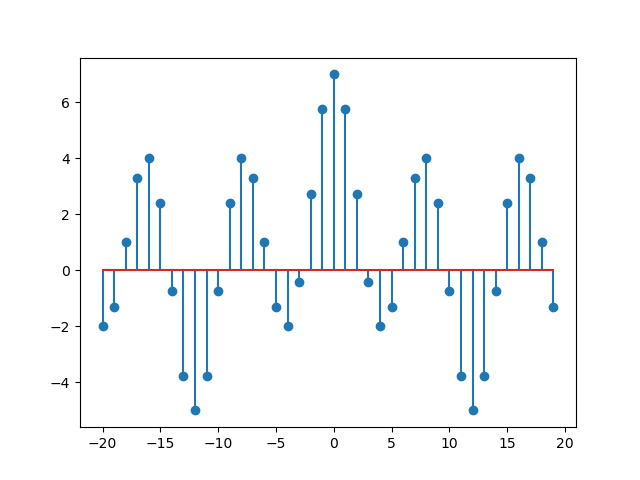

In [3]:
n = np.arange(-20,20)
x = 1 + 2*np.cos(np.pi/12*n) + 4*np.cos(np.pi/4*n)
plt.stem(n, x)

A frequência fundamental é $\omega_0=\frac{\pi}{12}$. Com isso o período fundamental é $T_0=24$. De fato, pelo gráfico, o sinal se repete a cada $24$ amostras.

---

Repare também que os coeficientes que multiplicam as exponenciais complexas são números reais. Isso não é obrigatório. Os coeficientes podem ser números complexos também. Porém, para que seja possível reconstruir um cosseno, é necessário que os coeficientes que multiplicam as exponenciais conjugadas uma da outra sejam também complexos conjugados.



---

### Exemplo 2

Considere agora o seguinte sinal:

$x[n] = e^{j0t} + e^{-j\frac{\pi}{3}}e^{j\frac{\pi}{12}n} +e^{j\frac{\pi}{3}}e^{-j\frac{\pi}{12}n}+2e^{-j\frac{\pi}{2}}e^{-j\frac{\pi}{4}n}+2e^{j\frac{\pi}{2}}e^{j\frac{\pi}{4}n}= 1 + 2\cos\left(\frac{\pi}{12}n-\frac{\pi}{3}\right) + 4\cos\left(\frac{\pi}{4}n-\frac{\pi}{2}\right)$

Como é possível observar, quando os coeficientes de cada exponencial complexa são complexos, a fase do cosseno resultante se altera.


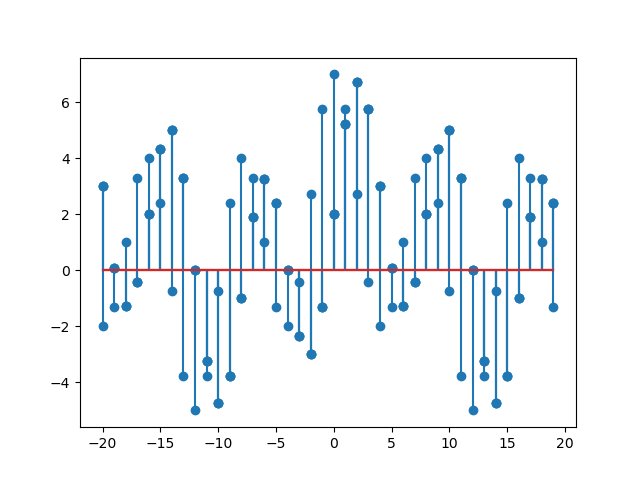

In [6]:
n = np.arange(-20,20)
x = 1 + 2*np.cos(np.pi/12*n-np.pi/3) + 4*np.cos(np.pi/4*n-np.pi/2)
plt.stem(n, x)
plt.show()

Isso faz com que o sinal resultante da combinação linear das mesmas exponenenciais complexas seja diferente da do exemplo 1.

## Representação gráfica da magnitude e fase dos coeficientes 

Uma maneira muito comum de representar os coeficientes é de maneira gráfica, com o valor da harmônica na abscissa e o módulo do coeficiente em um gráfico e a fase do coeficiente em outro gráfico.

---

### Exemplo 3

Vamos representar os coeficientes do exemplo 2 de forma gráfica. A harmônica fundamental é $\omega = \frac{\pi}{12}$. Então seus coeficientes estarão em $k=\pm 1$. A constante é $k=0$ e o cosseno de frequência angula $\frac{\pi}{4}$  é $k=\pm 3$. Como a harmônica fundamental é $\omega = \frac{\pi}{12}$, então o período fundamental é 24 amostras. Isso se reflete na decomposição do sinal em exponenciais harmônicas. Diferentemente da representação de sinais contínuos, existe um número finito de exponenciais complexas (nesse caso, 24). Isso faz com que após 24 exponenciais, as exponenciais começas a se repetir.



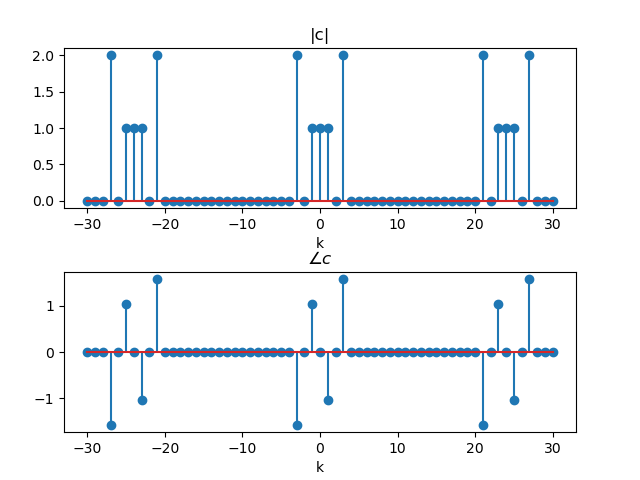

In [41]:
k = np.arange(-30,31,1)
cmod = np.zeros(len(k))
cfase = np.zeros(len(k))

cmod[6::24] = 1
cfase[6::24] = 0

cmod[7::24] = 1
cfase[7::24] = -np.pi/3

cmod[5::24] = 1
cfase[5::24] = np.pi/3

cmod[9::24] = 2
cfase[9::24] = np.pi/2

cmod[3::24] = 2
cfase[3::24] = -np.pi/2


plt.figure()
plt.subplot(2,1,1)
plt.stem(k, cmod)
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(k, cfase)
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=0.4)
plt.show()

---

Repare que o gráfico do módulo dos coeficientes é uma função par e o gráfico da fase dos coeficientes é uma função ímpar. Isso sempre vai acontecer com sinais reais. Repare também que os coeficientes se repetem a cada 24 (o período do sinal) expoenciais harmônicas. 

## Determinação dos coeficientes multiplicando cada harmônica

Supondo que um sinal periódico qualquer possa ser decomposto em uma soma de exponenciais complexas, quais são os coeficientes que multiplicam cada exponencial complexa. É isso que o método desenvolvido por Joseph Fourier respondeu e hoje é conhecido como **série de Fourier**.

Vamos supor que um sinal periódico $x[n]$ possa ser decomposto em soma de exponenciais complexas. Nesse caso, $x[n]$ pode escrito como:

$\boxed{x[n] = \displaystyle\sum_{k=<T_0>} c_ke^{jk\frac{2\pi}{T_0} n}}$

A indicação do somatório $k=<T_0>$ indica que o valor de $k$ varia dentro de um período do sinal. Por exemplo, um sinal com período 4 , poderíamos pegar os valores de $c_k$ em $k=1, 2,3 $ e 4.

A somatória é feita em apenas $T_0$ (período fundamental do sinal) frequências. Em tempo discreto existem apenas $T_0$ diferentes exponenciais harmonicamente relacionadas. A expressão acima é conhecida como **síntese** do sinal $x[n]$.

O objetivo aqui é encontrar o valor de $c_k$, para todo $k$. Para isso, vamos multiplicar ambos os lados por $e^{-jw\frac{2\pi}{T_0} n}$:

$x[n]e^{-jw\frac{2\pi}{T_0} n} = \displaystyle\sum_{k=<T_0>} c_ke^{jk2\frac{\pi}{T_0}n}e^{-jw\frac{2\pi}{T_0} n} \rightarrow x[n]e^{-jw\frac{2\pi}{T_0} n} = \displaystyle\sum_{k=<T_0>} c_ke^{j(k-w)2\frac{\pi}{T_0}n}$

Como $x[n]$ é periódico, com um período $T_0$, vamos somar ambos os lados da igualdade por um período $T_0$ do sinal:

$\displaystyle\sum_{n=<T_0>}^{n_0+T_0-1} x[n]e^{-jw\frac{2\pi}{T_0} n} = \displaystyle\sum_{n=<T_0>}\displaystyle\sum_{k=<T_0>} c_ke^{j(k-w)2\frac{\pi}{T_0}n}$

Como as variáveis das somatórias são  diferentes uma da outra, podemos mudar a ordem em que as somatória  aparecem:

$\displaystyle\sum_{n=<T_0>} x[n]e^{-jw\frac{2\pi}{T_0} n} = \displaystyle\sum_{k=<T_0>} \displaystyle\sum_{n=<T_0>}c_ke^{j(k-w)2\frac{\pi}{T_0}n}$


A segunda somatória do lado direito pode ser analisada em duas situações diferentes. A primeira, quando $k\neq w$, utilizando a expressão de somatória de uma progressão geométrica com $T_0$ termos:

 $\displaystyle\sum_{n=n_0}^{n_0+T_0-1}c_ke^{j(k-w)2\frac{\pi}{T_0}n} = c_k\displaystyle\sum_{n=n_0}^{n_0+T_0-1}\left(e^{j(k-w)2\frac{\pi}{T_0}}\right)^n = c_k\left(\frac{1-(e^{j(k-w)2\frac{\pi}{T_0}})^{T_0}}{1-e^{j(k-w)2\frac{\pi}{T_0}}}\right) = c_k\left(\frac{1-e^{j(k-w)2\frac{\pi}{T_0}T_0}}{1-e^{j(k-w)2\frac{\pi}{T_0}}}\right) = c_k\left(\frac{1-e^{j(k-w)2\pi}}{1-e^{j(k-w)2\frac{\pi}{T_0}}} \right) = c_k\left(\frac{1-1}{1-e^{j(k-w)2\frac{\pi}{T_0}}} \right) = 0$

A segunda situação, quando $w = k$:

$\displaystyle\sum_{n=<T_0>}c_ke^{j(0)2\frac{\pi}{T_0}n} = c_kT_0$

Então, a segunda somatória do lado direito da igualdade só vai ser diferente de zero quando $k=w$. Então:

$\displaystyle\sum_{n=<T_0>} x[n]e^{-jw\frac{2\pi}{T_0} n} = c_wT_0$

Com isso, o coeficiente $c_n$ pode ser obtido por:

$\boxed{c_w = \frac{1}{T_0}\displaystyle\sum_{n=<T_0>} x[n]e^{-jw\frac{2\pi}{T_0} n}}$

Essa expressão é conhecida como **análise** do sinal $x[n]$.

Perceba que o coeficiente $c_0$ corresponde à média do sinal $x[n]$. 

$c_0 = \frac{1}{T_0}\displaystyle\sum_{n=<T_0>} x[n]$

O valor de $c_0$ é comumente chamado de **valor DC** (direct current) ou **offset** do sinal.

A série de Fourier é representada pelo operador $\mathcal{SF}$:

$\mathcal{SF}(x[n]) = c_w$

### Exemplo 3

Vamos calcular os coeficientes da série de Fourier da onda quadrada com período $T_0=10$  mostrada no gráfico abaixo:

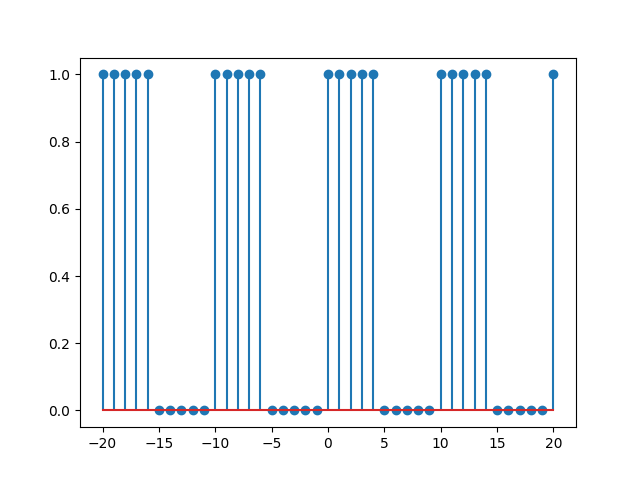

In [9]:
n = np.arange(-20,21)
x = np.zeros(len(n))
x[0:5] = 1
x[10:15] = 1
x[20:25] = 1
x[30:35] = 1
x[-1] = 1
plt.figure()
plt.stem(n,x)
plt.show()


O período fundamental é $T_0=10$ instantes. Então, os coeficientes $c_n$ da série de Fourier são:

$c_w = \frac{1}{10}\displaystyle\sum_{n=-5}^{4}x[n]e^{-jw\frac{2\pi}{10}n} =  \frac{1}{10}\displaystyle\sum_{n=0}^{4}e^{-jw\frac{2\pi}{10}n} = \frac{1}{10}\left(\frac{1-e^{-jw\frac{2\pi}{10}5}}{1-e^{-jw\frac{2\pi}{10}}}\right) = \left(\frac{1-e^{-jw\pi}}{1-e^{-jw\frac{\pi}{5}}}\right)=\frac{1}{10}\left(\frac{e^{j\frac{w\pi}{2}}-e^{-j\frac{w\pi}{2}}}{e^{j\frac{w\pi}{10}}-e^{-jw\frac{\pi}{10}}}\right)\frac{e^{j\frac{-w\pi}{2}}}{e^{j\frac{-w\pi}{10}}}= \frac{1}{10}\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{j\frac{-2w\pi}{5}}$


Para $w=0, \pm 10, \pm 20, ...$ a expressão acima não é válida, para esses valores de $w$, $c_w$ é definido como:

$c_w = 0.5$, para $w=0, \pm 10, \pm 20, ...$


O gráfico do módulo e fase dos coeficientes da série quadrada é:

/tmp/ipykernel_79945/2443482382.py:2: RuntimeWarning: invalid value encountered in divide
  c = np.sin(w*np.pi/2)/np.sin(w*np.pi/10)*np.exp(-1j*2*w*np.pi/5)/10


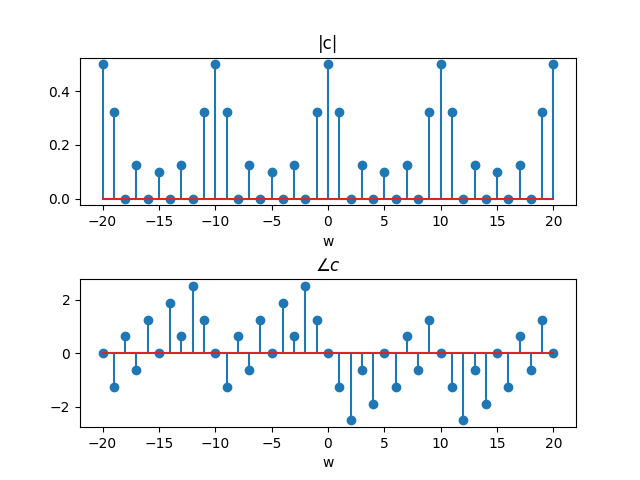

In [7]:
w = np.arange(-20,21)
c = np.sin(w*np.pi/2)/np.sin(w*np.pi/10)*np.exp(-1j*2*w*np.pi/5)/10
c[0::10] = 0.5
plt.figure()
plt.subplot(2,1,1)
plt.stem(w, np.abs(c))
plt.xlabel('w')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(w, np.angle(c))
plt.xlabel('w')
plt.title(r'$\angle c$')
plt.subplots_adjust(hspace=0.5)
plt.show()

## Propriedades da série de Fourier

- **Linearidade**

  Se $\mathcal{SF}(x_1[n]) = a_w$ e $\mathcal{SF}(x_2[n]) = b_w$

  Então:

  $\boxed{\mathcal{SF}(Ax_1[n]+Bx_2[n]) = Aa_w+Bb_w}$

- **Deslocamento no tempo**

  Se $\mathcal{SF}(x[n]) = a_w$

  Então:

  $\boxed{\mathcal{SF}(x[n-n_0]) = e^{-jw\omega_0 n_0}a_n}$

- **Primeira diferença**

  Se $\mathcal{SF}(x[n]) = a_w$

  Então:

  $\boxed{\mathcal{SF}(x[n]-x[n-1]) = (1-e^{-jw\frac{2\pi}{T_0}})a_w}$

- **Multiplicação**

  Se $\mathcal{SF}(x[n]) = a_w$ e $\mathcal{SF}(y[n]) = b_w$

   Então:

  $\boxed{\mathcal{SF}(x[n]y[n]) = \displaystyle\sum_{k=<T_0>}a_kb_{w-k}}$
  

---
### Exemplo  4


Considere agora o seguinte sinal de período $T_0=10$:

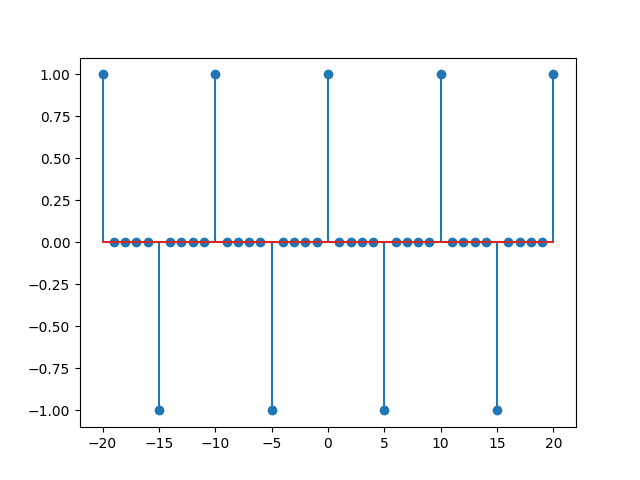

In [10]:

x[1:] = np.diff(x)
x[-1] = 1

plt.figure()
plt.stem(n, x)
plt.show()

Vamos agora calcular os coeficientes $c_w$ da série de Fourier deste sinal. Podemos ver que este sinalé $x[n] = x_q[n]-x_q[n-1]$, em que $x_q[n]$ é a onda quadrada do exemplo 3. Então podemos calcular a série de Fourier do sinal $x[n]$, usando a propriedade da primeira diferença:

Os coeficientes de Fourier da onda quadrada do exemplo 3 é:

$c_w = \frac{1}{10}\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{j\frac{-2w\pi}{5}}$

e

$c_w = 0.5$, para $w=0, \pm 10, \pm 20, ...$


Então  os coeficientes de $x[n]$: são:

$a_w = (1-e^{-jw\frac{2\pi}{10}})c_w = (1-e^{-jw\frac{\pi}{5}})\frac{1}{10}\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{j\frac{-2w\pi}{5}}=\frac{1}{10}(e^{jw\frac{\pi}{10}}-e^{-jw\frac{\pi}{10}})\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{-j\frac{2w\pi}{5}}e^{-j\frac{w\pi}{10}}=\frac{j}{5}(\mathrm{sen}(w\frac{\pi}{10}))\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{-j\frac{w\pi}{2}}=0.2\left(\mathrm{sen}(\frac{w\pi}{2})\right)e^{-j\frac{\pi}{2}(w-1)}$

Para $w$ par, $\mathrm{sen}(\frac{w\pi}{2})=0$. Então:

$a_w = 0$, com $w$ par.

Para $w$ ímpar:

$a_w = 0.2$, com $w$ ímpar.




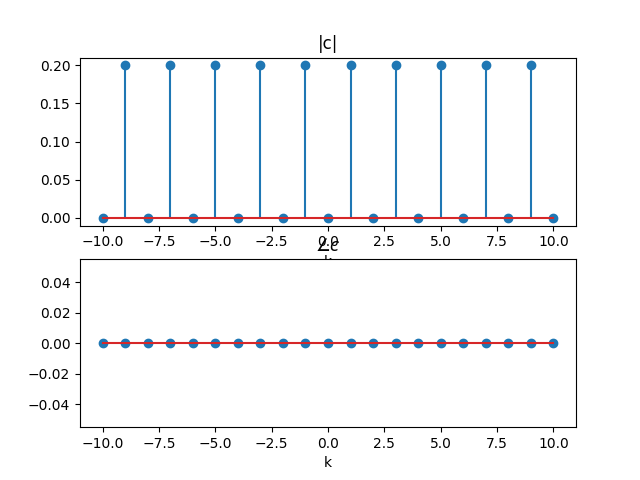

In [35]:
n = np.arange(-10,11)
c = np.zeros(len(n))
c[1::2] = 0.2
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1)
plt.show()

---

## Teorema de Parseval

O teorema de Parseval diz que a potência do sinal é igual à soma dos quadrados dos módulos dos coeficientes da série de Fourier.

$\frac{1}{T_0}\displaystyle\sum_{n=n_0}^{n_0+T_0-1}|x[n]|^2 = \sum_{k=n_0}^{n_0+T_0}|a_k|^2$

A demonstração fica como exercício.

## Reconstrução do sinal

Para reconstruir o sinal $x[n]$ a partir dos coeficientes de Fourier, basta usar a expressão de síntese do sinal $x[n]$.

$x[n] = \displaystyle\sum_{k=n_0}^{n_0+T_0-1}a_ke^{jk\omega_0 n}$

Diferentemente do tempo contínuo, sinais em tempo discreto precisam de apenas um número finito de sinais. Então, no caso de sinais de tempo discreto, não ocorrem problemas de convergência. 

--- 

###  Exemplo 5

Vamos reconstruir o sinal do exemplo 4. Os coeficientes da série de Fourier são dados pela seguinte expressão:

$a_w = 0.2$, com $w$ ímpar.

e 

$a_w = 0$ com $w$ par.

Então a reconstrução do sinal $x[n]$ fica:

$x[n] = \displaystyle\sum_{w=<T_0>}c_we^{jw\frac{\pi}{5} n}$

Para reconstruir o sinal, precisamos de apenas 10 amostras. Diferentemente da série de Fourier de tempo contínuo, não há problemas de convergências para o tempo discreto. O sinal sempre é reconstruído de forma exata.



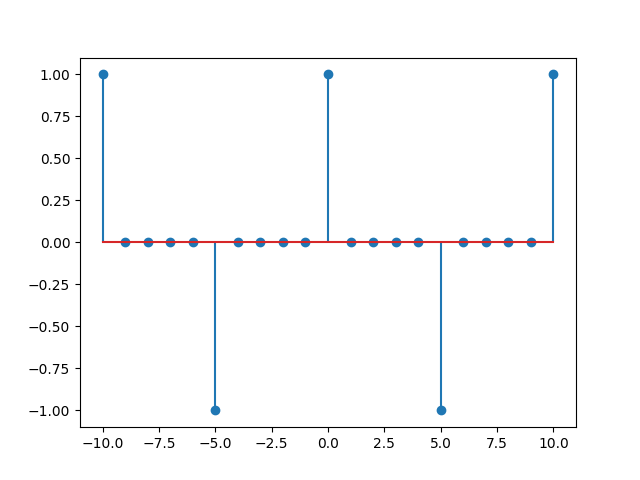

In [36]:
n = np.arange(-10,11)

x = np.zeros(len(n))

for k in range(0, 10):
    if k%2==0:
        c = 0
    else:
        c = 0.2
    x = x + c*np.exp(1j*k*np.pi/5*n)

plt.figure()
plt.stem(n, x)
plt.show()

Quanto maior o número de termos, melhor é a reconstrução.

## Séries de Fourier como entrada de um sistema linear e invariante no tempo

Como já visto anteriormente se um sinal $x[n] = e^{j\omega n}$ é usado como entrada de um sistema linear e invariante no tempo com resposta em frequência $H(e^{j\omega})$, então sua saída será:

$y[n] = H(e^{j\omega})e^{j\omega n}$

Então ao expressar um sinal periódico como uma série de Fourier:

$x[n] = \displaystyle\sum_{k=<T_0>} c_ke^{jk\omega_0n}$

a sua saída será:

$y[n] = \displaystyle\sum_{k=<T_0>} c_kH(e^{j\omega})e^{jk\omega_0n}$

---

### Exemplo 7

Um sistema linear e invariante no tempo é um **filtro-ideal**, com a seguinte resposta em frequência:

$H(e^{j\omega}) = \left\{\begin{array}{cc}1& ,|\omega|< \frac{8}{5}  \\0& \text{, c.c.} \end{array}\right.$

Um filtro-ideal é um sistema que tem ganho 1 até uma determinada frequência $\omega_c$ e ganho 0 para frequências maiores do que $\omega_c$.

Um onda quadrada com período 10 e valor 1 entre 0 e 5 instantes e valor 0 entre 6 e 10 é usada como sinal de entrada. Esse sinal tem os seguintes coeficientes da série de Fourier (veja exemplo 3):

$c_k = \frac{1}{10}\left(\frac{\mathrm{sen}(\frac{k\pi}{2})}{\mathrm{sen}(\frac{k\pi}{10})}\right)e^{j\frac{-2k\pi}{5}}$ para $k\neq 0, \pm 10, \pm 20...$

e $c_0=0,5$ para $k= 0, \pm 10, \pm 20...$.

A frequência fundamental desse sinal é $\omega_0 = \frac{2\pi}{10}=\frac{\pi}{5}$.

Então, a saída desse sistema para a onda quadrada como entrada é:

$y[n]=\displaystyle\sum_{k=-\infty}^\infty c_kH(e^{jk\omega_0})e^{jk\omega_0n}$

Para $k = 3$, a frequência correspondente é $\omega = 3\omega_0 = 3\frac{\pi}{5}> \frac{8}{5}$. Para frequências acima de $\frac{8}{5}$, $H(e^{j\omega}) = 0$. Então, a saída fica:

$y[n] = \displaystyle\sum_{k=-2}^2 c_kH(e^{j\omega})e^{jk\omega_0n} = 0.5+\displaystyle\sum_{k=1}^2\frac{1}{10}\left(\frac{\mathrm{sen}(\frac{-k\pi}{2})}{\mathrm{sen}(\frac{-k\pi}{10})}\right)e^{j\frac{2k\pi}{5}}e^{-jk\frac{\pi}{5}n}+\frac{1}{10}\left(\frac{\mathrm{sen}(\frac{k\pi}{2})}{\mathrm{sen}(\frac{k\pi}{10})}\right)e^{j\frac{-2k\pi}{5}}e^{jk\frac{\pi}{5}n}$

$y[n] = \frac{1}{10}\left(\frac{\mathrm{sen}(-\pi)}{\mathrm{sen}(-\frac{\pi}{5})}\right)e^{j\frac{4\pi}{5}}e^{-j2\frac{\pi}{5}n} + \frac{1}{10}\left(\frac{\mathrm{sen}(-\frac{\pi}{2})}{\mathrm{sen}(-\frac{\pi}{10})}\right)e^{j\frac{2\pi}{5}}e^{-j\frac{\pi}{5}n} + \frac{1}{10}0.5 + \frac{1}{10}\left(\frac{\mathrm{sen}(\frac{\pi}{2})}{\mathrm{sen}(\frac{\pi}{10})}\right)e^{j\frac{-2\pi}{5}}e^{j\frac{\pi}{5}n} + \frac{1}{10}\left(\frac{\mathrm{sen}(\pi)}{\mathrm{sen}(\frac{\pi}{5})}\right)e^{j\frac{-4\pi}{5}}e^{j2\frac{\pi}{5}n}$

$y[n] = \frac{1}{10}\left(\frac{0}{\mathrm{sen}(-\frac{\pi}{5})}\right)e^{j\frac{4\pi}{5}}e^{-j2\frac{\pi}{5}n} + \frac{1}{10}\left(\frac{-1}{\mathrm{sen}(-\frac{\pi}{10})}\right)e^{j\frac{2\pi}{5}}e^{-j\frac{\pi}{5}n} + \frac{1}{20} + \frac{1}{10}\left(\frac{1}{\mathrm{sen}(\frac{\pi}{10})}\right)e^{j\frac{-2\pi}{5}}e^{j\frac{\pi}{5}n} + \frac{1}{10}\left(\frac{0}{\mathrm{sen}(\frac{\pi}{5})}\right)e^{j\frac{-4\pi}{5}}e^{j2\frac{\pi}{5}n}$

$y[n] = \frac{1}{10}\left(\frac{1}{0.31}\right)e^{j\frac{2\pi}{5}}e^{-j\frac{\pi}{5}n} + \frac{1}{20} + \frac{1}{10}\left(\frac{1}{0.31}\right)e^{j\frac{-2\pi}{5}}e^{j\frac{\pi}{5}n} = \frac{1}{20}+\cos\left(\frac{\pi}{5}n-\frac{2\pi}{5}\right)$

---

## Exercícios

**1)** Demonstre o teorema de Parseval para série de Fourier de tempo discreto.


**2)** Calcule os coeficientes da série de Fourier dos sinais abaixo:

a)

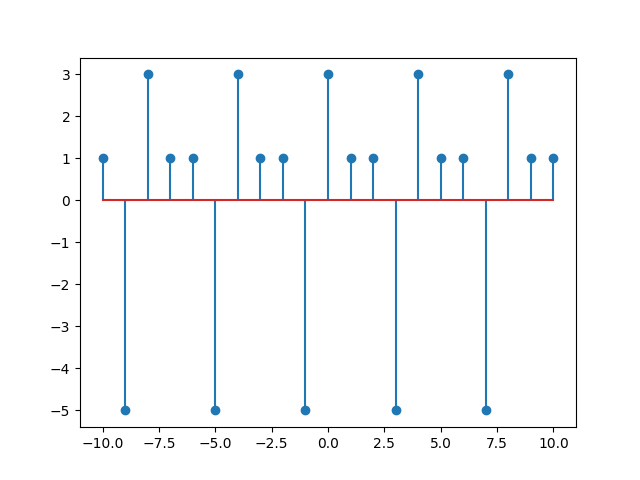

In [47]:
n = np.arange(-10,11)
x = [1,-5, 3,1,1, -5, 3,1,1,-5,3,1,1,-5,3,1,1, -5,3,1,1]
plt.figure()
plt.stem(n, x)
plt.show()

b)

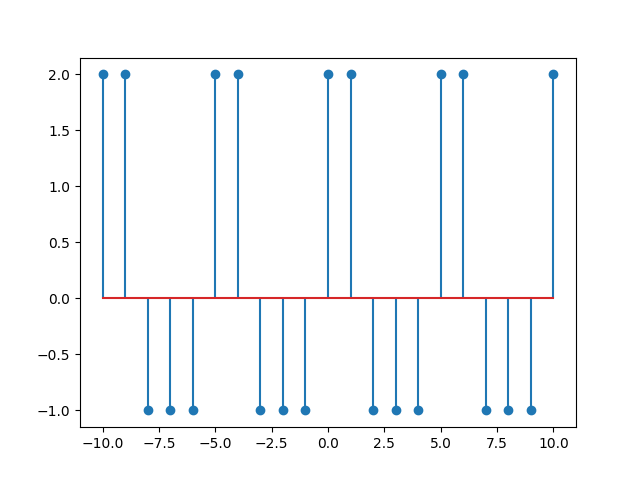

In [52]:
n = np.arange(-10,11)
x = [2,2, -1,-1,-1,2,2,-1,-1,-1,2,2,-1,-1,-1,2,2,-1,-1,-1,2]
plt.figure()
plt.stem(n, x)
plt.show()

c)

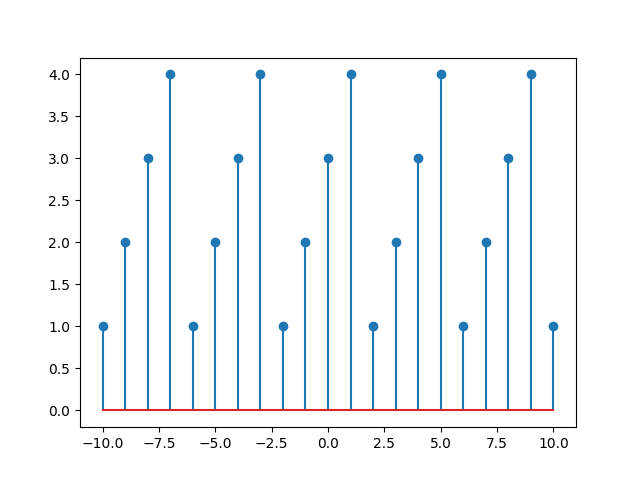

In [56]:
n = np.arange(-10,11)
x = [1,2, 3,4,1,2, 3,4,1,2, 3,4,1,2, 3,4,1,2, 3,4,1]
plt.figure()
plt.stem(n, x)
plt.show()

d) 

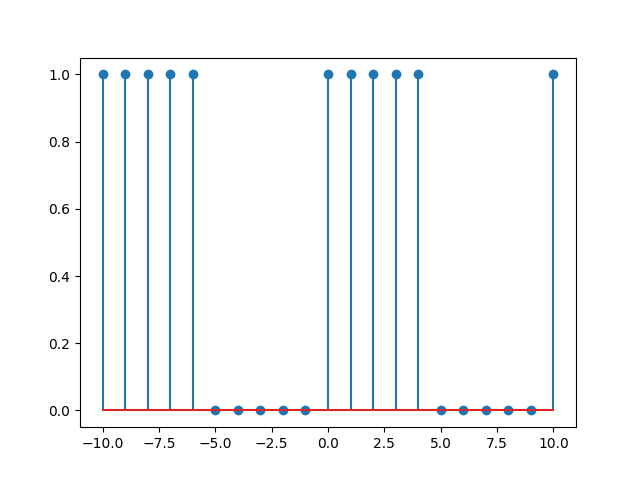

In [58]:
n = np.arange(-10,11)
x = [1,1, 1,1,1,0, 0,0,0,0, 1,1,1,1,1,0,0,0, 0,0,1]
plt.figure()
plt.stem(n, x)
plt.show()

**3)** Considere um sistema com a seguinte resposta em frequência:

$H(e^{j\omega}) = \left\{\begin{array}{cc}1 &, |\omega|< \frac{\pi}{6} \\ 0 &,\frac{\pi}{6} \leq |\omega|< \pi \\ H(e^{j(\omega-2\pi)})&, \forall \omega\end{array}\right.$


Qual a saída do sistema para a seguinte entrada:



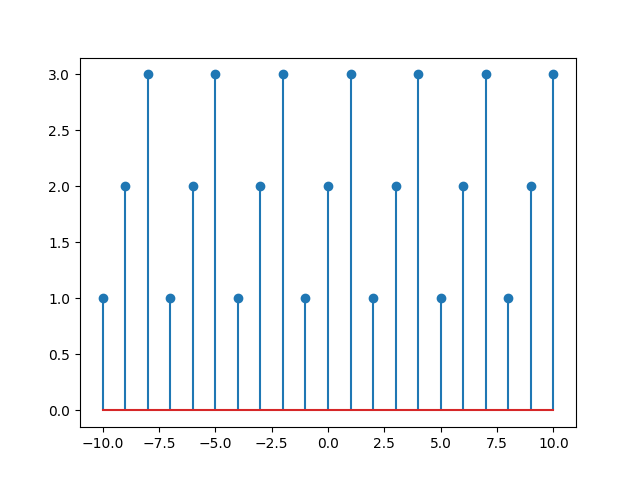

In [59]:
n = np.arange(-10,11)
x = [1,2, 3,1,2,3, 1,2,3,1, 2,3,1,2,3,1,2,3, 1,2,3]
plt.figure()
plt.stem(n, x)
plt.show()

**4)** Um sistema de tempo discreto tem a seguinte resposta ao impulso:

$h[n] = a\delta[n] + b\delta[n-1] + c\delta[n-2]$

O sinal $x[n]$, mostrado no gráfico abaixo, é colocado na entrada do sistema.

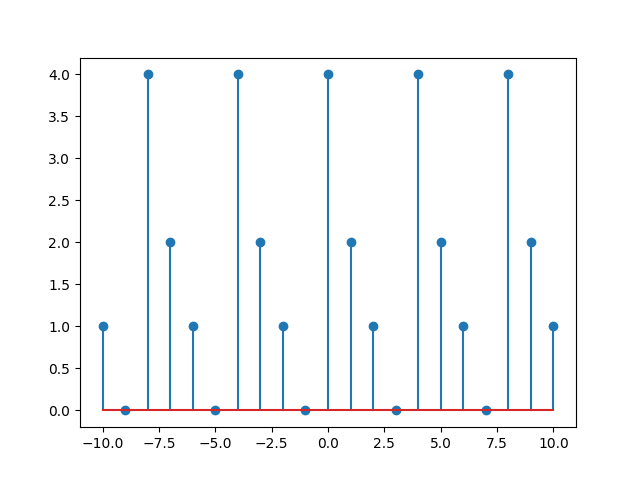

In [61]:
n = np.arange(-10,11)
x = [1,0,4,2, 1,0,4,2, 1,0,4,2, 1,0,4,2, 1,0,4,2, 1]
plt.figure()
plt.stem(n, x)
plt.show()

É obtido o seguinte sinal de saída:

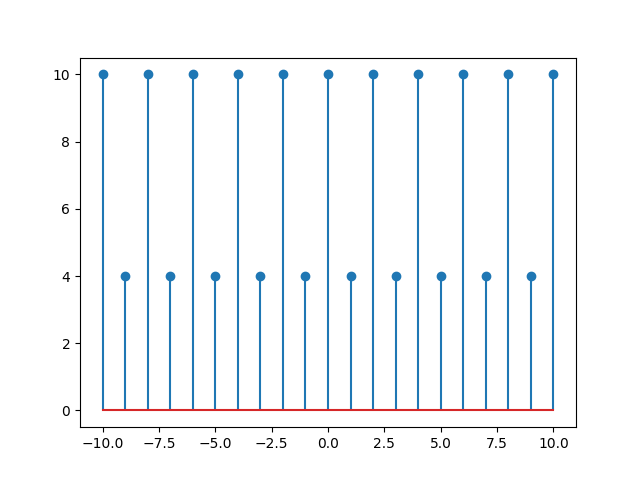

In [62]:
n = np.arange(-10,11)
x = [10,4,10,4, 10,4,10,4, 10,4,10,4, 10,4,10,4, 10,4,10,4, 10]
plt.figure()
plt.stem(n, x)
plt.show()

Quais os valores de $a$, $b$ e $c$?

**5)** Encontre e faça o gráfico dos coeficientes da série de Fourier dos seguintes sinais.

a) $x_1[n] = \mathrm{sen}(3.2\pi n)+\cos(2.4\pi n)$

b) $x_2[n] = \cos(2.2\pi n)+\cos(3.3\pi n)$

c) $x_3[n] = \cos\left(\frac{2\pi}{4}n\right) + \cos\left(\frac{2\pi}{7}n\right) $

d) $x_4[n] = \cos\left(\frac{2\pi}{5}n\right) + \cos\left(\frac{2\pi}{9}n\right) $

**6)** Encontre e faça o gráfico dos coeficientes da série de Fourier dos seguintes sinais.

a) $x_1[n] = \left\{\begin{array}{cc}\delta[n]&, 0<n<N_0 \\ x_1[n-N_0]&, \forall n \end{array}\right.$

b) $x_2[n] = \left\{\begin{array}{cc}\delta[n]-\delta[n-2]&, 0<n<4 \\ x_2[n-4]&, \forall n \end{array}\right.$

c) $x_3[n] = \left\{\begin{array}{cc}\delta[n]-\delta[n-2] +\delta[n-4]-\delta[n-6] &, 0<n<8 \\ x_3[n-8]&, \forall n \end{array}\right.$

**7)** Encontre a saída dos sistemas abaixo para a seguinte entrada:

$x[n] = \left\{\begin{array}{cc}1-\delta[n] - \delta[n-6]&, 0<n<12 \\ x[n-12]&, \forall n \end{array}\right.$

a) $H(z) =  \frac{10z-8}{z^2}$

b) $y[n] = 0.5y[n-1] + 2x[n]$

c) $H(z) = \frac{1}{1+0.9z^{-1}}$

d) $y[n] = -0.4y[n-1] + x[n-1]$

## Referências


- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010

## Solução dos exercícios

**1)** Resolvido por Catherine

$$
\frac{1}{N} \sum_{k=0}^{N-1} |a_k|^2 + |b_k|^2 = \sum_{n=-\infty}^\infty |x[n]|^2
$$

**Demonstração:**
A Série de Fourier de \(x[n]\) é dada por:

$$
x[n] = \sum_{k=-\infty}^\infty c_k e^{j2\pi nk/N}
$$

onde $c_k = a_k - jb_k$ são os coeficientes complexos da Série de Fourier.

A energia do sinal no domínio do tempo é definida como:

$$
E_x = \sum_{n=-\infty}^\infty |x[n]|^2
$$

Substituindo a expressão da Série de Fourier:

$$
E_x = \sum_{n=-\infty}^\infty \left|\sum_{k=-\infty}^\infty c_k e^{j2\pi nk/N}\right|^2
$$

$$
E_x = \sum_{n=-\infty}^\infty \left(\sum_{k=-\infty}^\infty c_k e^{j2\pi nk/N}\right) \left(\sum_{m=-\infty}^\infty c_m^* e^{-j2\pi nm/N}\right)
$$

$$
E_x = \sum_{n=-\infty}^\infty \sum_{k=-\infty}^\infty \sum_{m=-\infty}^\infty c_k c_m^* e^{j2\pi n(k-m)/N}
$$

$$
E_x = \sum_{k=-\infty}^\infty \sum_{m=-\infty}^\infty c_k c_m^* \sum_{n=-\infty}^\infty e^{j2\pi n(k-m)/N}
$$

A soma interna envolvendo \(n\) é uma série de impulsos periódicos \(N\), o que significa que:

$$
\sum_{n=-\infty}^\infty e^{j2\pi n(k-m)/N} = N \cdot \delta[k-m]
$$


$$
E_x = N \sum_{k=-\infty}^\infty c_k c_k^* = N \sum_{k=-\infty}^\infty |c_k|^2
$$

$$
E_x = N \sum_{k=-\infty}^\infty (a_k^2 + b_k^2)
$$

$$
\frac{1}{N} \sum_{k=-\infty}^\infty (a_k^2 + b_k^2) = \sum_{n=-\infty}^\infty |x[n]|^2
$$